<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/Keras5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Детали метода fit в Keras

Сегодня обсудим:
1. Как обучаться по батчам (batch_size)
2. Как при обучении считать метрики и на тесте (validation_data)
3. Как обучаться на генераторах
4. И как визуализировать процесс обучения


Получение данных

Описание датасета:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, X_test.shape

57026/57026 [==============================] - 0s 0us/step


((404, 13), (102, 13))

In [ ]:
X_train[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

Масштабирование данных

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

mean, std

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [ ]:
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
X_train.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

In [ ]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Архитектура сети


Определение сети через класс Sequential и добавление слоев в него через add

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(9)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Обучение сети

In [ ]:
%%time

num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs)

Epoch 1/10
13/13 [==============================] - 3s 8ms/step - loss: 577.6455 - mae: 22.2771
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 552.1992 - mae: 21.7273
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 527.0702 - mae: 21.1845
Epoch 4/10
13/13 [==============================] - 0s 25ms/step - loss: 499.5734 - mae: 20.5741
Epoch 5/10
13/13 [==============================] - 0s 15ms/step - loss: 466.0179 - mae: 19.8282
Epoch 6/10
13/13 [==============================] - 0s 17ms/step - loss: 423.3872 - mae: 18.8689
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 371.7760 - mae: 17.5955
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 314.9016 - mae: 16.0498
Epoch 9/10
13/13 [==============================] - 0s 8ms/step - loss: 254.3791 - mae: 14.1603
Epoch 10/10
13/13 [==============================] - 0s 10ms/step - loss: 198.6382 - mae: 12.1582
CPU times: user 2.07 s, sys: 107 m

Сейчас прошло 13 батчей через сеть

#### **batch_size**
> batch_size: Integer или None.<br>
Количество сэмплов за один шаг градиентного спуска<br>
Если None, то batch_size примет дефолтное значение 32<br>
Не указывайте batch_size, если ваши данные представлены в виде генератора или keras.utils.Sequence (из-за того, что они сами генерируют данные батчами)

In [ ]:
X_train.shape

(404, 13)

In [ ]:
404 / 32

12.625

<img src='https://drive.google.com/uc?export=view&id=1j8SxKYEi12jzJXi_bPO28q5SV9emuu0Y'>

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs,
          batch_size=64)

Epoch 1/10
7/7 [==============================] - 0s 8ms/step - loss: 161.8336 - mae: 10.6805
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 139.9734 - mae: 9.7196
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 121.6629 - mae: 8.9444
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 107.0853 - mae: 8.2484
Epoch 5/10
7/7 [==============================] - 0s 20ms/step - loss: 94.6019 - mae: 7.6389
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 84.4375 - mae: 7.1095
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 75.8428 - mae: 6.6329
Epoch 8/10
7/7 [==============================] - 0s 16ms/step - loss: 68.1057 - mae: 6.2129
Epoch 9/10
7/7 [==============================] - 0s 15ms/step - loss: 61.7162 - mae: 5.8566
Epoch 10/10
7/7 [==============================] - 0s 14ms/step - loss: 55.6949 - mae: 5.5247
CPU times: user 513 ms, sys: 19.3 ms, total: 532 ms
Wall time: 1.5

In [ ]:
404 / 64

6.3125

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs,
          batch_size=404)

Epoch 1/10
1/1 [==============================] - 0s 28ms/step - loss: 52.2837 - mae: 5.3354
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 51.6250 - mae: 5.2975
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 50.9782 - mae: 5.2599
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 50.3434 - mae: 5.2223
Epoch 5/10
1/1 [==============================] - 0s 42ms/step - loss: 49.7210 - mae: 5.1856
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 49.1120 - mae: 5.1500
Epoch 7/10
1/1 [==============================] - 0s 41ms/step - loss: 48.5154 - mae: 5.1148
Epoch 8/10
1/1 [==============================] - 0s 39ms/step - loss: 47.9312 - mae: 5.0800
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 47.3591 - mae: 5.0457
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 46.7985 - mae: 5.0120
CPU times: user 285 ms, sys: 14.5 ms, total: 300 ms
Wall time: 829 ms

#### **steps_per_epoch**

>  steps_per_epoch: Integer or `None`.<br>
        Общее количество шагов (батчей сэмплов) на одной эпохе. <br>
        Если стоит None, то steps_per_epoch равняется количеству сэмплов в датасете деленное на batch size

In [ ]:
404 / 10

40.4

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 0s 5ms/step - loss: 44.0470 - mae: 4.8423
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 39.9519 - mae: 4.5770
Epoch 3/10
10/10 [==============================] - 0s 13ms/step - loss: 36.3724 - mae: 4.3588
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 33.8860 - mae: 4.2046
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 31.8988 - mae: 4.0674
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 30.2303 - mae: 3.9560
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 28.9526 - mae: 3.8639
Epoch 8/10
10/10 [==============================] - 0s 9ms/step - loss: 27.7988 - mae: 3.7890
Epoch 9/10
10/10 [==============================] - 0s 10ms/step - loss: 26.9376 - mae: 3.7334
Epoch 10/10
10/10 [==============================] - 0s 8ms/step - loss: 26.1212 - mae: 3.6789
CPU times: user 591 ms, sys: 23.4 ms, total: 614 ms
Wall

#### **validation_split**

> validation_split: Float между 0 и 1.<br>
        Доля обучающих данных, которая будет использоваться как валидационная часть<br>
        Модель возьмет эту долю и не будет на ней обучаться, а будет подсчитывать метрики и функцию потерь в конце каждой эпохи<br>
        Данные для валидации берутся из данных с конца в `x` и `y` **до перемешивания**.

In [ ]:
404 - 81

323

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          batch_size=1,
          validation_split=0.2)

Epoch 1/10
323/323 [==============================] - 4s 11ms/step - loss: 23.4202 - mae: 3.3994 - val_loss: 21.0647 - val_mae: 3.4214
Epoch 2/10
323/323 [==============================] - 3s 9ms/step - loss: 17.8573 - mae: 2.9863 - val_loss: 17.1680 - val_mae: 3.0921
Epoch 3/10
323/323 [==============================] - 2s 5ms/step - loss: 15.1941 - mae: 2.6903 - val_loss: 17.1426 - val_mae: 3.2252
Epoch 4/10
323/323 [==============================] - 2s 5ms/step - loss: 13.2552 - mae: 2.5279 - val_loss: 14.8308 - val_mae: 2.9081
Epoch 5/10
323/323 [==============================] - 3s 11ms/step - loss: 12.2521 - mae: 2.4049 - val_loss: 14.1870 - val_mae: 2.8837
Epoch 6/10
323/323 [==============================] - 1s 5ms/step - loss: 11.2367 - mae: 2.3210 - val_loss: 15.7526 - val_mae: 2.7817
Epoch 7/10
323/323 [==============================] - 1s 2ms/step - loss: 10.5615 - mae: 2.3518 - val_loss: 13.4374 - val_mae: 2.7194
Epoch 8/10
323/323 [==============================] - 1s 2ms

#### **validation_data**

> validation_data: Данные, на которых считается функция потерь и метрики в конце каждой эпохи<br>
Модель не будет обучаться на этих данных


In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          batch_size=1,
          validation_data=(X_test, y_test))

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 10.1883 - mae: 2.2577 - val_loss: 21.0811 - val_mae: 3.0041
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 10.0301 - mae: 2.2425 - val_loss: 20.9901 - val_mae: 3.1147
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 9.5694 - mae: 2.2213 - val_loss: 23.0623 - val_mae: 3.0973
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 9.6029 - mae: 2.2154 - val_loss: 24.1658 - val_mae: 3.1759
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 9.2423 - mae: 2.1600 - val_loss: 20.3745 - val_mae: 3.0282
Epoch 6/10
404/404 [==============================] - 1s 3ms/step - loss: 8.8284 - mae: 2.1138 - val_loss: 19.8209 - val_mae: 2.8851
Epoch 7/10
404/404 [==============================] - 2s 4ms/step - loss: 8.4609 - mae: 2.0930 - val_loss: 21.3264 - val_mae: 3.0055
Epoch 8/10
404/404 [==============================] - 1s 3ms/step -

#### **validation_batch_size**

>validation_batch_size: Integer или `None`.<br>
        Количество сэмплов в один валидационный батч<br>
        Если None, то по дефолту равняется `batch_size`.<br>
        Не указывайте `validation_batch_size`, если ваши данные представлены в виде генератора или keras.utils.Sequence (из-за того, что они сами генерируют данные батчами)

In [ ]:
X_test.shape

(102, 13)

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          batch_size=1,
          validation_data=(X_test, y_test),
          validation_batch_size=X_test.shape[0])

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 7.9101 - mae: 1.9924 - val_loss: 17.2365 - val_mae: 2.7353
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 7.9717 - mae: 2.0023 - val_loss: 17.6940 - val_mae: 2.8572
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 7.6244 - mae: 1.9923 - val_loss: 19.7891 - val_mae: 2.8949
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 7.8231 - mae: 2.0013 - val_loss: 21.1397 - val_mae: 2.9782
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 7.6040 - mae: 1.9705 - val_loss: 17.2456 - val_mae: 2.8175
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 7.3185 - mae: 1.9319 - val_loss: 17.4146 - val_mae: 2.7172
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 6.9537 - mae: 1.8915 - val_loss: 19.0834 - val_mae: 2.8516
Epoch 8/10
404/404 [==============================] - 1s 2ms/step - l

#### **validation_freq**
>validation_freq: Только нужен, если предоставлены validation data. Integer
        или `collections.abc.Container` (например, list, tuple, и др.).<br>
        Если integer, то столько эпох с обучением пройдет, до одной валидации, например, `validation_freq=2` будет запускать валидацию каждые 2 эпохи.<br>
        Если это Container, то валидация будет запущена в эти эпохи, к примеру,`validation_freq=[1, 2, 10]` запускает валидацию на 1, 2 и 10 эпохах.

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          batch_size=1,
          validation_data=(X_test, y_test),
          validation_batch_size=X_test.shape[0],
          validation_freq=2)

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 6.6431 - mae: 1.8431
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 6.7405 - mae: 1.8414 - val_loss: 16.4107 - val_mae: 2.7393
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 6.4514 - mae: 1.8212
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 6.6401 - mae: 1.8433 - val_loss: 19.4960 - val_mae: 2.8574
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 6.4832 - mae: 1.8431
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 6.2846 - mae: 1.8026 - val_loss: 15.7963 - val_mae: 2.5866
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 5.9123 - mae: 1.7571
Epoch 8/10
404/404 [==============================] - 1s 2ms/step - loss: 6.2981 - mae: 1.7892 - val_loss: 17.7605 - val_mae: 2.9508
Epoch 9/10
404/404 [==============================] - 1s 2ms/step - loss: 5.8583 - mae: 

In [ ]:
%%time
num_epochs = 10

model.fit(X_train, y_train,
          epochs=num_epochs, 
          batch_size=1,
          validation_data=(X_test, y_test),
          validation_batch_size=X_test.shape[0],
          validation_freq=[1, 5, 10])

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 5.7400 - mae: 1.7239 - val_loss: 15.0133 - val_mae: 2.5423
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 5.8994 - mae: 1.7280
Epoch 3/10
404/404 [==============================] - 1s 3ms/step - loss: 5.6313 - mae: 1.7001
Epoch 4/10
404/404 [==============================] - 1s 3ms/step - loss: 5.8083 - mae: 1.7404
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 5.7340 - mae: 1.7402 - val_loss: 14.7606 - val_mae: 2.5953
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 5.5479 - mae: 1.7065
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 5.1876 - mae: 1.6520
Epoch 8/10
404/404 [==============================] - 1s 2ms/step - loss: 5.5650 - mae: 1.6932
Epoch 9/10
404/404 [==============================] - 1s 2ms/step - loss: 5.1685 - mae: 1.6363
Epoch 10/10
404/404 [==============================] - 1s 2ms/step - 

### Обучение нейросети на генераторах

Про Sequence больше [тут](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence)

In [ ]:
import numpy as np
#from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, labels, batch_size=32):
        self.batch_size = batch_size
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return int(np.round(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        X = self.data[index * self.batch_size : (index+1) * self.batch_size]
        y = self.labels[index * self.batch_size : (index+1) * self.batch_size]

        return X, y

In [ ]:
train_datagen = DataGenerator(X_train, y_train)
test_datagen = DataGenerator(X_test, y_test)

In [ ]:
len(train_datagen)

13

In [ ]:
len(test_datagen)

3

In [ ]:
for X, y in train_datagen:
    print(X.shape)
    print(y.shape)
    break

(32, 13)
(32,)


In [ ]:
404 / 32

12.625

In [ ]:
%%time
num_epochs = 10

model.fit(train_datagen,
          epochs=num_epochs, 
          validation_data=test_datagen)

Epoch 1/10
13/13 [==============================] - 1s 18ms/step - loss: 4.9604 - mae: 1.5813 - val_loss: 10.8587 - val_mae: 2.4586
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 4.4441 - mae: 1.4696 - val_loss: 10.1958 - val_mae: 2.3908
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 4.3174 - mae: 1.4666 - val_loss: 10.1397 - val_mae: 2.3839
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 4.2951 - mae: 1.4711 - val_loss: 10.2045 - val_mae: 2.3924
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 4.2593 - mae: 1.4626 - val_loss: 10.2958 - val_mae: 2.4062
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 4.2390 - mae: 1.4578 - val_loss: 10.3441 - val_mae: 2.4119
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 4.2343 - mae: 1.4580 - val_loss: 10.3665 - val_mae: 2.4133
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 4.2264 - 

### History

Больше [тут](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History) 

In [ ]:
%%time
num_epochs = 50

history = model.fit(train_datagen,
                    epochs=num_epochs, 
                    validation_data=test_datagen)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 4.2033 - mae: 1.4516 - val_loss: 10.3204 - val_mae: 2.4028
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1984 - mae: 1.4504 - val_loss: 10.2717 - val_mae: 2.3950
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 4.1977 - mae: 1.4516 - val_loss: 10.2973 - val_mae: 2.4012
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1947 - mae: 1.4495 - val_loss: 10.2410 - val_mae: 2.3904
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1824 - mae: 1.4461 - val_loss: 10.2734 - val_mae: 2.3955
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1868 - mae: 1.4510 - val_loss: 10.2458 - val_mae: 2.3918
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1795 - mae: 1.4489 - val_loss: 10.2879 - val_mae: 2.3986
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 4.1715 - ma

In [ ]:
history

In [ ]:
history.history

{'loss': [4.203336715698242,
  4.198439598083496,
  4.19774866104126,
  4.194680690765381,
  4.182363510131836,
  4.186787128448486,
  4.1794843673706055,
  4.171491622924805,
  4.165003299713135,
  4.163246154785156,
  4.160518646240234,
  4.152813911437988,
  4.148003101348877,
  4.147953033447266,
  4.1557183265686035,
  4.14171838760376,
  4.140407562255859,
  4.135788917541504,
  4.135436534881592,
  4.132004261016846,
  4.125892639160156,
  4.1238274574279785,
  4.130366325378418,
  4.1194586753845215,
  4.123128890991211,
  4.116687297821045,
  4.117896556854248,
  4.107085227966309,
  4.110342502593994,
  4.10580587387085,
  4.1046366691589355,
  4.105923652648926,
  4.100790023803711,
  4.102657318115234,
  4.097344398498535,
  4.08951997756958,
  4.0925469398498535,
  4.077587127685547,
  4.072129249572754,
  4.072021961212158,
  4.08218240737915,
  4.077493667602539,
  4.063054084777832,
  4.059482574462891,
  4.05851936340332,
  4.05497932434082,
  4.064332485198975,
  4.04

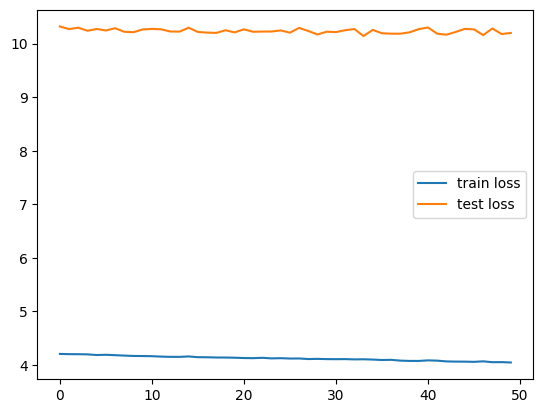

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend();

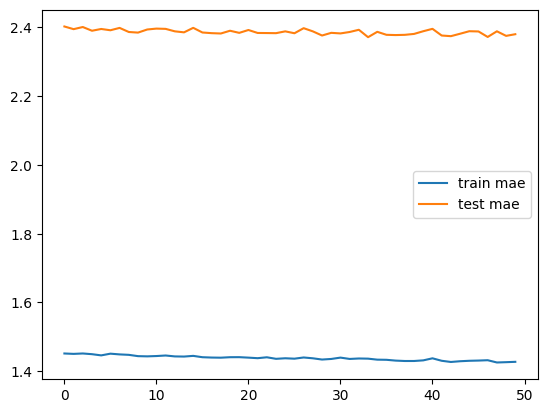

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='test mae')
plt.legend();

History - Callback, про них поговорим в следующих занятиях

## Summary


Вот мы и разобрались в деталях, что можно передавать в метод fit в Keras.

**validation_data** и **validation_batch_size**

<img src='https://media0.giphy.com/media/yOhgNO9YsmdsQ/giphy.gif?cid=ecf05e473qx1a618m4t3o922udc1mcfmqtfwdyi4mrqg2gcf&rid=giphy.gif&ct=g'>

___________________

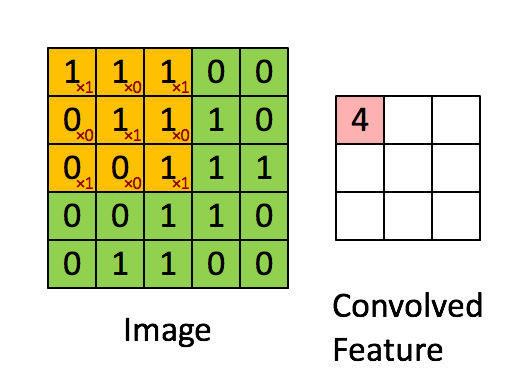

1/1 [==============================] - 0s 148ms/step


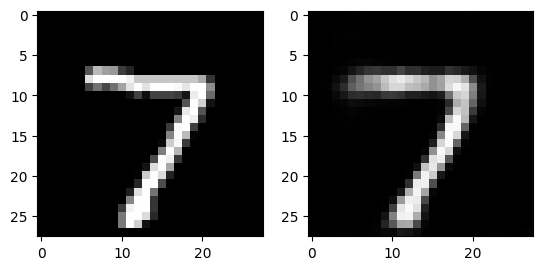

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist

import matplotlib.pyplot as plt

enc_input = Input(shape=(28, 28, 1))
x = Conv2D(32, 3, activation='relu')(enc_input)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2, padding='same')(x)
x = Flatten()(x)
enc_output = Dense(8, activation='linear')(x)

encoder = keras.Model(enc_input, enc_output, name="encoder")

dec_input = keras.Input(shape=(8,), name="encoded_img")
x = Dense(7 * 7 * 8, activation='relu')(dec_input)
x = keras.layers.Reshape((7, 7, 8))(x)
x = Conv2DTranspose(64, 5, strides=(2, 2), activation="relu", padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = Conv2DTranspose(32, 5, strides=(2, 2), activation="linear", padding='same')(x)
x = keras.layers.BatchNormalization()(x)
dec_output = Conv2DTranspose(1, 3, activation="sigmoid", padding='same')(x)

decoder = keras.Model(dec_input, dec_output, name="decoder")

autoencoder_input = Input(shape=(28, 28, 1), name="img")
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = keras.Model(autoencoder_input, autoencoder_output, name="autoencoder")
#autoencoder.summary()


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, batch_size=32, epochs=1)

h = encoder.predict(tf.expand_dims(x_test[0], axis=0))
img = decoder.predict(h)

plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10, mnist

tf.random.set_seed(1)


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
#model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

print( model.evaluate(x_test, y_test) )

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/15
625/625 [==============================] - 224s 355ms/step - loss: 1.8336 - accuracy: 0.2839 - val_loss: 1.5420 - val_accuracy: 0.4100
Epoch 2/15
625/625 [==============================] - 230s 368ms/step - loss: 1.3686 - accuracy: 0.4907 - val_loss: 1.1847 - val_accuracy: 0.5582
Epoch 3/15
625/625 [==============================] - 233s 373ms/step - loss: 1.1304 - accuracy: 0.5887 - val_loss: 1.0540 - val_accuracy: 0.6098
Epoch 4/15
625/625 [==============================] - 236s 377ms/step - loss: 0.9899 - accuracy: 0.6442 - val_loss: 0.8885 - val_accuracy: 0.6792
Epoch 5/15
625/625 [==============================] - 224s 358ms/step - loss: 0.8789 - accuracy: 0.6864 - val_loss: 0.8821 - val_accuracy: 0.6917
Epoch 6/15
625/625 [==============================] - 229s 367ms/step - loss: 0.8047 - accuracy: 0.7128 - val_loss: 0.7837 - val_accuracy: 0.7197
Epoch 7/15
625/625 [==============================] - 230